In [1]:
import torch
import subprocess
import numpy as np
import torch.optim as optim
from math import *
import model as model
import matplotlib.pyplot as plt

In [2]:
dim = 30
potential1 = model.init_model(dim);

In [8]:
device = "cpu"
potential1.load_state_dict(torch.load("./model_save/potential100.pt"))
potential1.to(device)
file_name ="example1"

# value_vec =np.zeros(dim)
# value_vec[:15] = 1
# value_vec[15:] = -1

# xlist  = np.linspace(-pi+pi/100, pi, 100)
# F_save = np.zeros((dim,np.size(xlist)))
# for i in range(dim):
#     inputs = torch.zeros(dim,np.size(xlist)).to(device);
#     for j in range(dim):
#         inputs[j,:] = value_vec[j]
#     inputs[i,:] = torch.tensor(xlist).to(device);
#     F = potential1.bias_potential(inputs,1)
#     F = F- torch.min(F)
#     F_save[i,:] = F[0,:].cpu().detach().numpy();
# np.savez(file_name,data=F_save,x=xlist)

In [9]:
def compute_energy(dim1,dim2,vec):
    xlist = np.linspace(-pi, pi, 100)
    ylist = np.linspace(-pi, pi, 100)
    X, Y = np.meshgrid(xlist, ylist)
    inputs = torch.zeros(X.shape[0]*X.shape[1],dim)
    for i in range(dim):
        inputs[:,i] =vec[i];
    inputs[:,dim1] = torch.tensor(X.reshape(-1));
    inputs[:,dim2] = torch.tensor(Y.reshape(-1));
    Z = potential1.bias_potential(inputs.T,1)
    return X,Y,Z.reshape(X.shape).detach().numpy() 

In [10]:
value_vec =np.zeros(dim)
# value_vec[:15] = -2.54
# value_vec[15:] = 2.72
value_vec =  np.loadtxt("../value_vec.txt")

for i in range(15):
    X,Y,Z = compute_energy(i,i+15,value_vec)
    np.savez(f"example_2D_example1_phi{i+1}_psi{i+1}.npz",X=X,Y=Y,Z=Z)


for i in range(14):
    X,Y,Z = compute_energy(i,i+1,value_vec)
    np.savez(f"example_2D_example1_phi{i+1}_phi{i+2}.npz",X=X,Y=Y,Z=Z)



for i in range(14):
    X,Y,Z = compute_energy(i+15,i+16,value_vec)
    np.savez(f"example_2D_example1_psi{i+1}_psi{i+2}.npz",X=X,Y=Y,Z=Z)


In [11]:
value_vec =np.zeros(dim)
value_vec[:15] = -2.54
value_vec[15:] = 2.72
# value_vec =  np.loadtxt("../value_vec.txt")

for i in range(15):
    X,Y,Z = compute_energy(i,i+15,value_vec)
    np.savez(f"e2_example_2D_example1_phi{i+1}_psi{i+1}.npz",X=X,Y=Y,Z=Z)


for i in range(14):
    X,Y,Z = compute_energy(i,i+1,value_vec)
    np.savez(f"e2_example_2D_example1_phi{i+1}_phi{i+2}.npz",X=X,Y=Y,Z=Z)



for i in range(14):
    X,Y,Z = compute_energy(i+15,i+16,value_vec)
    np.savez(f"e2_example_2D_example1_psi{i+1}_psi{i+2}.npz",X=X,Y=Y,Z=Z)


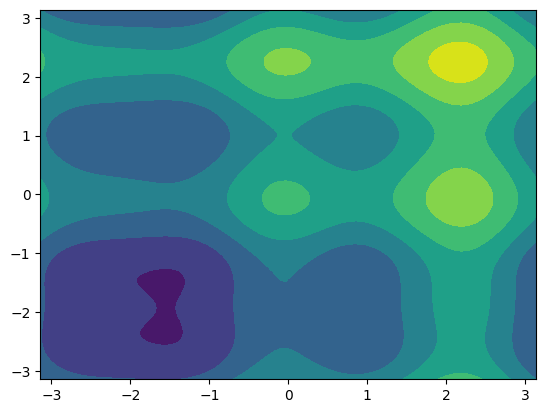

In [ ]:
X,Y,Z = compute_energy(0,1,value_vec)
plt.contourf(X,Y,Z)

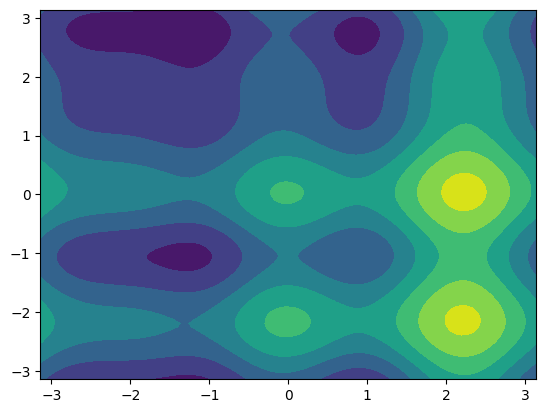

In [ ]:
X,Y,Z = compute_energy(3,4,value_vec)
plt.contourf(X,Y,Z)

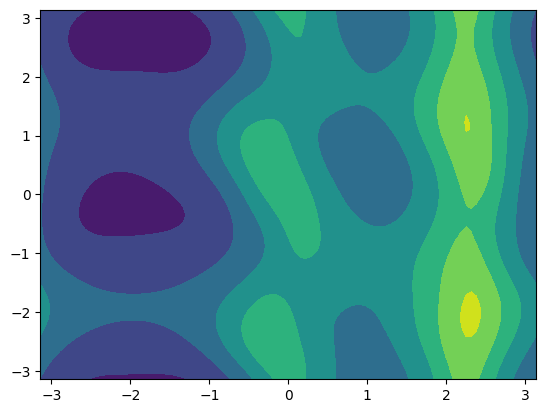

In [9]:
X,Y,Z = compute_energy(0,15,value_vec)
plt.contourf(X,Y,Z)

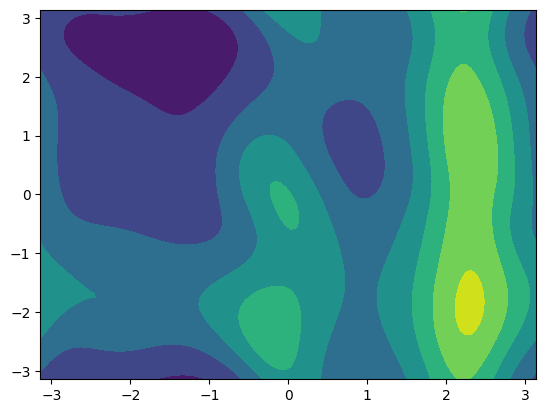

In [10]:
X,Y,Z = compute_energy(1,16,value_vec)
plt.contourf(X,Y,Z)